In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
# from sklearn.decomposition import PCA as sklearnPCA
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from scipy.stats import zscore

# from sklearn.decomposition import PCA as sklearnPCA
# from sklearn.preprocessing import StandardScaler

# from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
# url = 'https://raw.githubusercontent.com/hasobi/skripsi/master/dataset/KDDTrain%2B_v1.csv'
url = 'https://raw.githubusercontent.com/hasobi/skripsi/dev/dataset/gabungan_train_test-original.csv'

In [0]:
df = pd.read_csv(url)

In [0]:
data = df

In [0]:
# dicitionary untuk merubah tipe serangan menjadi lebih umum seperti Normal, DoS, Probe, U2R, dan R2L

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

data.replace(attack_dict, inplace = True)

In [0]:
data_primary = data.loc[data['type_attack'].isin(['normal','dos'])]

In [0]:
data_primary.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [0]:
protocol_dict ={
    "udp" : 0,
    "tcp" : 1,
    "icmp": 2
}

service_dict={
    "Z39_50" : 0,
    "X11" : 1,
    "whois" : 2,
    "vmnet" : 3,
    "uucp_path" : 4,
    "uucp" : 5,
    "urp_i" : 6,
    "urh_i" : 7,
    "time" : 8,
    "tim_i" : 9,
    "tftp_u" : 10,
    "telnet" : 11,
    "systat" : 12,
    "supdup" : 13,
    "sunrpc" : 14,
    "ssh" : 15,
    "sql_net" : 16,
    "smtp" : 17,
    "shell" : 18,
    "rje" : 19,
    "remote_job" : 20,
    "red_i" : 21,
    "private" : 22,
    "printer" : 23,
    "pop_3" : 24,
    "pop_2" : 25,
    "pm_dump" : 26,
    "other" : 27,
    "ntp_u" : 28,
    "nntp" : 29,
    "nnsp" : 30,
    "netstat" : 31,
    "netbios_ssn" : 32,
    "netbios_ns" : 33,
    "netbios_dgm" : 34,
    "name" : 35,
    "mtp" : 36,
    "login" : 37,
    "link" : 38,
    "ldap" : 39,
    "kshell" : 40,
    "klogin" : 41,
    "iso_tsap" : 42,
    "IRC" : 43,
    "imap4" : 44,
    "http_8001" : 45,
    "http_443" : 46,
    "http_2784" : 47,
    "http" : 48,
    "hostnames" : 49,
    "harvest" : 50,
    "gopher" : 51,
    "ftp_data" : 52,
    "ftp" : 53,
    "finger" :  54,
    "exec" : 55,
    "efs" : 56,
    "ecr_i" : 57,
    "eco_i" : 58,
    "echo" : 59,
    "domain_u" : 60,
    "domain" : 61,
    "discard" : 62,
    "daytime" : 63,
    "ctf" : 64,
    "csnet_ns" : 65,
    "courier" : 66,
    "bgp" : 67,
    "auth" : 68,
    "aol" : 69

}

flag_dict={
    "SH" : 0,
    "SF" : 1,
    "S3" : 2,
    "S2" : 3,
    "S1" : 4,
    "S0" : 5,
    "RSTR" : 6,
    "RSTOS0" : 7,
    "RSTO" : 8,
    "REJ" : 9,
    "OTH" : 10

}

data_primary.replace(flag_dict, inplace = True)
data_primary.replace(service_dict, inplace = True)
data_primary.replace(protocol_dict, inplace = True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [0]:
data_primary.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,1,52,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [0]:
data_all = data_primary#.drop(columns=['num_packet', 'type_attack'])

In [0]:
data_all.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,1,52,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [0]:
data_all.type_attack.unique()

array(['normal', 'dos'], dtype=object)

In [0]:
attck_dict={
    "normal" : 0,
    "dos" : 1
}
data_all.replace(attck_dict, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [0]:
data_all.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,1,52,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0
1,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0
2,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1
3,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0
4,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0


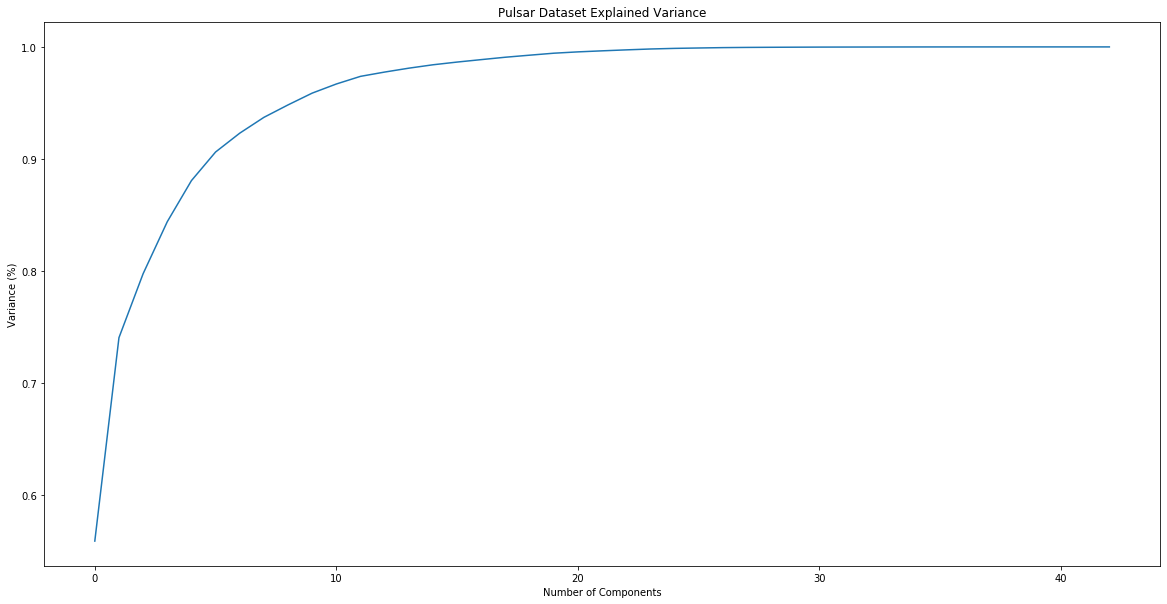

In [0]:
## MULAI PCA

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data_all.iloc[:,:])

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
# plt.figure()
plt.figure(figsize=(20,10)) 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [0]:
pca = PCA(n_components=43)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40,column 41,column 42
0,-0.359484,0.152876,0.361109,0.820087,0.122868,-0.169893,-0.277777,0.140925,-0.078939,-0.208735,-0.146810,0.268275,-0.091025,-0.128393,0.016105,-0.002812,-0.043688,0.060784,-0.000272,-0.037402,-0.052871,-0.024103,-0.045404,-0.040902,-0.001758,0.019851,0.000218,-0.000843,-0.005763,-0.002471,0.003603,0.000991,-0.002221,-0.001216,-0.000802,-0.000955,-0.000114,0.000063,-0.000031,-0.000451,0.000028,-0.000014,-9.770487e-18
1,0.095598,0.319265,0.635343,1.216086,-0.161888,-0.193264,0.010652,-0.269921,0.420491,0.497590,0.435476,-0.213107,-0.079719,-0.060006,-0.009454,-0.017013,-0.120787,-0.065978,0.359024,0.010888,0.023555,0.129036,0.146715,-0.000759,-0.010921,-0.023568,0.030300,0.006131,-0.025575,-0.018415,0.001081,0.000601,-0.001393,-0.000687,0.000229,0.000312,0.002070,0.000218,-0.000102,-0.000270,-0.000186,0.000003,1.775566e-17
2,1.826767,-0.410122,-0.091865,-0.079756,-0.010291,-0.057748,0.098613,-0.098677,0.032396,-0.004336,0.040640,0.043301,0.015429,-0.022509,-0.004910,0.017358,0.007333,0.010644,0.035487,-0.022599,-0.009427,0.044503,0.037514,0.001893,-0.001211,-0.000982,0.002760,0.001389,0.000557,0.000492,-0.000594,-0.000133,-0.000104,0.000108,-0.000016,-0.000123,-0.000141,0.000009,0.000011,0.000076,-0.000003,0.000004,-9.805385e-17
3,-1.096171,-0.401025,-0.414557,-0.189177,0.288627,0.001497,-0.135139,-0.130875,-0.091888,0.019752,0.016406,-0.004850,-0.092074,0.072930,0.057305,0.033899,-0.104971,0.031789,-0.014805,-0.016248,0.019184,0.010602,-0.023460,0.010763,0.000609,0.044760,0.042301,-0.002330,0.003881,0.001866,-0.000269,0.000094,-0.000033,0.000148,0.000013,0.000788,0.000098,-0.000065,0.000016,-0.000241,0.000042,-0.000002,4.074923e-17
4,-1.099988,-0.269401,0.056646,-0.309968,-0.418478,0.010449,-0.021187,0.001827,0.111396,0.025077,-0.051499,0.001901,0.019353,-0.015949,0.031436,-0.016752,0.002045,-0.004077,-0.015645,0.035796,0.006097,0.003987,0.007234,-0.001414,-0.001339,-0.005605,-0.001607,-0.000338,0.001039,0.000573,0.000572,-0.000019,0.000692,-0.000164,-0.000872,-0.000536,-0.000168,0.000099,-0.000036,0.000082,-0.000022,0.000004,-1.333991e-18


In [0]:
df.shape

(153123, 43)

In [0]:
df.mean(axis = 0) 

column 0    -4.412456e-17
column 1     3.929779e-17
column 2     1.310823e-16
column 3     9.786476e-17
column 4    -2.263598e-17
column 5    -1.029503e-17
column 6     1.018382e-16
column 7    -3.700490e-17
column 8     1.559054e-17
column 9    -2.941586e-17
column 10   -9.815587e-18
column 11   -7.821691e-18
column 12    4.924270e-17
column 13    2.350713e-18
column 14   -2.612009e-17
column 15   -3.206443e-17
column 16    5.417073e-17
column 17   -1.120855e-17
column 18    6.932946e-17
column 19    1.847755e-17
column 20    9.778661e-18
column 21    8.482215e-18
column 22   -6.746891e-17
column 23    2.588569e-17
column 24    1.772675e-18
column 25   -2.137582e-17
column 26   -1.899404e-17
column 27    3.964845e-17
column 28    5.369131e-19
column 29    1.212113e-18
column 30   -1.885382e-18
column 31   -2.701484e-19
column 32    3.092429e-19
column 33    1.505958e-19
column 34   -1.046774e-18
column 35   -5.761765e-20
column 36   -1.375944e-19
column 37    1.923395e-20
column 38   

In [0]:
df2 = df.drop(columns=['column 0',
                       'column 4',
                       'column 5',
                       'column 7',
                       'column 9',
                       'column 10',
                       'column 11',
                       'column 13',
                       'column 14',
                       'column 15',
                       'column 22',
                       'column 25',
                       'column 26',
                       'column 30',
                       'column 31',
                       'column 33',
                       'column 34',
                       'column 35',
                       'column 36',
                       'column 37',
                       'column 38',
                       'column 40',
                       'column 41'])

In [0]:
# df2.head()
df2.mean(axis = 0) 

column 1     3.929779e-17
column 2     1.310823e-16
column 3     9.786476e-17
column 6     1.018382e-16
column 8     1.559054e-17
column 12    4.924270e-17
column 16    5.417073e-17
column 17   -1.120855e-17
column 18    6.932946e-17
column 19    1.847755e-17
column 20    9.778661e-18
column 21    8.482215e-18
column 23    2.588569e-17
column 24    1.772675e-18
column 27    3.964845e-17
column 28    5.369131e-19
column 29    1.212113e-18
column 32    3.092429e-19
column 39    1.046257e-19
column 42    2.325044e-19
dtype: float64

In [0]:
df2.head()

,column 1,column 2,column 3,column 6,column 8,column 12,column 16,column 17,column 18,column 19,column 20,column 21,column 23,column 24,column 27,column 28,column 29,column 32,column 39,column 42
0,0.152876,0.361109,0.820087,-0.277777,-0.078939,-0.091025,-0.043688,0.060784,-0.000272,-0.037402,-0.052871,-0.024103,-0.040902,-0.001758,-0.000843,-0.005763,-0.002471,-0.002221,-0.000451,-9.770487e-18
1,0.319265,0.635343,1.216086,0.010652,0.420491,-0.079719,-0.120787,-0.065978,0.359024,0.010888,0.023555,0.129036,-0.000759,-0.010921,0.006131,-0.025575,-0.018415,-0.001393,-0.000270,1.775566e-17
2,-0.410122,-0.091865,-0.079756,0.098613,0.032396,0.015429,0.007333,0.010644,0.035487,-0.022599,-0.009427,0.044503,0.001893,-0.001211,0.001389,0.000557,0.000492,-0.000104,0.000076,-9.805385e-17
3,-0.401025,-0.414557,-0.189177,-0.135139,-0.091888,-0.092074,-0.104971,0.031789,-0.014805,-0.016248,0.019184,0.010602,0.010763,0.000609,-0.002330,0.003881,0.001866,-0.000033,-0.000241,4.074923e-17
4,-0.269401,0.056646,-0.309968,-0.021187,0.111396,0.019353,0.002045,-0.004077,-0.015645,0.035796,0.006097,0.003987,-0.001414,-0.001339,-0.000338,0.001039,0.000573,0.000692,0.000082,-1.333991e-18


In [0]:
# 5 most significant
# col 2,3,6,20,8 + target 42


In [0]:
dfv1 = df.drop(columns=['column 41'])

In [0]:
dfv1.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40,column 42
0,-0.359484,0.152876,0.361109,0.820087,0.122868,-0.169893,-0.277777,0.140925,-0.078939,-0.208735,-0.146810,0.268275,-0.091025,-0.128393,0.016105,-0.002812,-0.043688,0.060784,-0.000272,-0.037402,-0.052871,-0.024103,-0.045404,-0.040902,-0.001758,0.019851,0.000218,-0.000843,-0.005763,-0.002471,0.003603,0.000991,-0.002221,-0.001216,-0.000802,-0.000955,-0.000114,0.000063,-0.000031,-0.000451,0.000028,-9.770487e-18
1,0.095598,0.319265,0.635343,1.216086,-0.161888,-0.193264,0.010652,-0.269921,0.420491,0.497590,0.435476,-0.213107,-0.079719,-0.060006,-0.009454,-0.017013,-0.120787,-0.065978,0.359024,0.010888,0.023555,0.129036,0.146715,-0.000759,-0.010921,-0.023568,0.030300,0.006131,-0.025575,-0.018415,0.001081,0.000601,-0.001393,-0.000687,0.000229,0.000312,0.002070,0.000218,-0.000102,-0.000270,-0.000186,1.775566e-17
2,1.826767,-0.410122,-0.091865,-0.079756,-0.010291,-0.057748,0.098613,-0.098677,0.032396,-0.004336,0.040640,0.043301,0.015429,-0.022509,-0.004910,0.017358,0.007333,0.010644,0.035487,-0.022599,-0.009427,0.044503,0.037514,0.001893,-0.001211,-0.000982,0.002760,0.001389,0.000557,0.000492,-0.000594,-0.000133,-0.000104,0.000108,-0.000016,-0.000123,-0.000141,0.000009,0.000011,0.000076,-0.000003,-9.805385e-17
3,-1.096171,-0.401025,-0.414557,-0.189177,0.288627,0.001497,-0.135139,-0.130875,-0.091888,0.019752,0.016406,-0.004850,-0.092074,0.072930,0.057305,0.033899,-0.104971,0.031789,-0.014805,-0.016248,0.019184,0.010602,-0.023460,0.010763,0.000609,0.044760,0.042301,-0.002330,0.003881,0.001866,-0.000269,0.000094,-0.000033,0.000148,0.000013,0.000788,0.000098,-0.000065,0.000016,-0.000241,0.000042,4.074923e-17
4,-1.099988,-0.269401,0.056646,-0.309968,-0.418478,0.010449,-0.021187,0.001827,0.111396,0.025077,-0.051499,0.001901,0.019353,-0.015949,0.031436,-0.016752,0.002045,-0.004077,-0.015645,0.035796,0.006097,0.003987,0.007234,-0.001414,-0.001339,-0.005605,-0.001607,-0.000338,0.001039,0.000573,0.000572,-0.000019,0.000692,-0.000164,-0.000872,-0.000536,-0.000168,0.000099,-0.000036,0.000082,-0.000022,-1.333991e-18


In [0]:
X = dfv1.loc[:, :'column 40']
y = dfv1.loc[:, 'column 42']

In [0]:
y = y.astype(str)

In [0]:
temp = set(y)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
clf = MLPClassifier(random_state = 0)

In [0]:
clf.fit(X_train, y_train)

In [0]:
pred = clf.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_test,pred)

In [0]:
from sklearn.model_selection import cross_validate


In [0]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, ShuffleSplit

In [0]:
clf = MLPClassifier(random_state = 0, max_iter=300)

In [0]:
scoring = {'accuracy': make_scorer(accuracy_score)}

In [0]:
cv = ShuffleSplit(n_splits=3, test_size=0.33, random_state=2)
scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

In [0]:
print(scores)